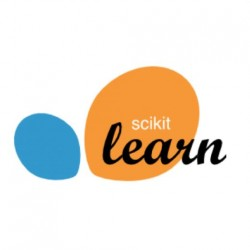

# Scikit-learn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.[1]

Scikit-learn library will be imported and if it is not installed it will be installed using ***pip*** command.

In [3]:
try:
    import sklearn
except:
    !pip install scikit-learn[alldeps]

## 1. Import and understand Breast Cancer Wisconsin Diagnostic dataset

Scikitlearn library includes many of datasets that can be ussef to train and test machine learning model. One of them is the Breast Cancer Wisconsin Diagnostic Database. 

The dataset includes various information about breast cancer tumors, as well as classification labels of malignant or benign. The dataset has 569 instances, or data, on 569 tumors and includes information on 30 attributes, or features, such as the radius of the tumor, texture, smoothness, and area.

Using this dataset, machine learning model will br built to use new tumor information to predict whether or not a tumor is malignant or benign.


So we will import the data set from scikit-learn.

In [5]:
from sklearn.datasets import load_breast_cancer

# Load dataset

data = load_breast_cancer()

The data variable represents a Python object that works like a dictionary. The important dictionary keys to consider are the classification label names (target_names), the actual labels (target), the attribute/feature names (feature_names), and the attributes (data).
Attributes capture important characteristics about the nature of the data. Given the label we are trying to predict (malignant versus benign tumor), possible useful attributes include the size, radius, and texture of the tumor.


In [7]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
# Organization of data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

To get a better understanding of our dataset, let’s take a look at our data by printing our class labels, the first data instance’s label, our feature names, and the feature values for the first data instance.

In [10]:
# Look at our data
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


As the image shows, our class names are malignant and benign, which are then mapped to binary values of 0 and 1, where 0 represents malignant tumors and 1 represents benign tumors. Therefore, our first data instance is a malignant tumor whose mean radius is 1.79900000e+01.

## 2. Organize Breast Cancer Wisconsin Diagnostic dataset

First, we should always split our dataset into two parts: training set and test set.
Generally, we use training set to train our model (classifier in this case) and evaluate it  during development stage. 
We use test set to test our model on unseen examples.
There is a function in scikit-learn library called ***train_test_split()*** that permits this splitting of data.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data

# train and test are X's of model
# train_labels and test_labels are Y's of model

train, test, train_labels, test_labels = train_test_split(features,labels, test_size=0.33, random_state = 42)

The function randomly splits the data using the test_size parameter. In this example, we now have a test set (test) that represents 33% of the original dataset. The remaining data (train) then makes up the training data.

## 3. Building the Model of Classifier and Making Predictions

There are many models for machine learning, and each model has its own strengths and weaknesses. In this example, we will focus on a simple algorithm that usually performs well in binary classification tasks, namely Naive Bayes (NB).

**Naive bayes methods** are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. [2]

In [14]:
from sklearn.naive_bayes import GaussianNB

# Initialize classifier
gnb = GaussianNB()

# Train classifier
model = gnb.fit(train,train_labels)

After we train the model, we can then use the trained model to make predictions on our test set, which we do using the predict() function. The predict() function returns an array of predictions for each data instance in the test set. We can then print our predictions to get a sense of what the model determined.


In [15]:
# Make predictions
preds = gnb.predict(test)
print(preds) # 0: malignant, 1:benign

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]


## 4. Evaluating the model's accuracy

Using the array of true class labels, we can evaluate the accuracy of our model’s predicted values by comparing the two arrays (test_labels vs. preds)

In [18]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy

print(accuracy_score(test_labels,preds))

0.9414893617021277


As you see in the output, the NB classifier is 94.15% accurate. This means that 94.15 percent of the time the classifier is able to make the correct prediction as to whether or not the tumor is malignant or benign.

***Sources:***
[1] https://en.wikipedia.org/wiki/Scikit-learn
[2] https://scikit-learn.org/stable/modules/naive_bayes.html